In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import sys
sys.path.append('/content/drive/MyDrive/nlpscratch')
import numpy as np
from common import config
config.GPU = True
import pickle
from common.trainer import Trainer
from common.optimizer import Adam
from chapter4cbow.cbow import CBOW
from common.util import create_contexts_target, to_cpu, to_gpu
from dataset import ptb

------------------------------------------------------------
                       GPU Mode (cupy)
------------------------------------------------------------



In [3]:
window_size = 5
hidden_size = 100
batch_size = 100
max_epoch = 10

# 读入数据
corpus, word_to_id, id_to_word = ptb.load_data('train')
vocab_size = len(word_to_id)

# 生成上下文和目标词，即输入和正确解
contexts, target = create_contexts_target(corpus, window_size)
if config.GPU:
    contexts, target = to_gpu(contexts), to_gpu(target)

# 生成模型
model = CBOW(vocab_size, hidden_size, window_size, corpus)
optimizer = Adam()
trainer = Trainer(model, optimizer)

# 开始学习
trainer.fit(contexts, target, max_epoch, batch_size)


| epoch 1 |  iter 1 / 9295 | time 17[s] | loss 4.16
| epoch 1 |  iter 21 / 9295 | time 17[s] | loss 4.16
| epoch 1 |  iter 41 / 9295 | time 17[s] | loss 4.15
| epoch 1 |  iter 61 / 9295 | time 18[s] | loss 4.12
| epoch 1 |  iter 81 / 9295 | time 18[s] | loss 4.05
| epoch 1 |  iter 101 / 9295 | time 18[s] | loss 3.93
| epoch 1 |  iter 121 / 9295 | time 18[s] | loss 3.78
| epoch 1 |  iter 141 / 9295 | time 18[s] | loss 3.64
| epoch 1 |  iter 161 / 9295 | time 18[s] | loss 3.50
| epoch 1 |  iter 181 / 9295 | time 19[s] | loss 3.37
| epoch 1 |  iter 201 / 9295 | time 19[s] | loss 3.27
| epoch 1 |  iter 221 / 9295 | time 19[s] | loss 3.16
| epoch 1 |  iter 241 / 9295 | time 19[s] | loss 3.10
| epoch 1 |  iter 261 / 9295 | time 19[s] | loss 2.99
| epoch 1 |  iter 281 / 9295 | time 20[s] | loss 2.96
| epoch 1 |  iter 301 / 9295 | time 20[s] | loss 2.92
| epoch 1 |  iter 321 / 9295 | time 20[s] | loss 2.89
| epoch 1 |  iter 341 / 9295 | time 20[s] | loss 2.84
| epoch 1 |  iter 361 / 9295 | tim

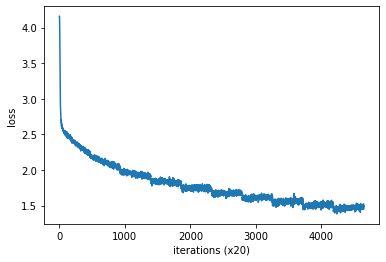

In [4]:
trainer.plot()



In [5]:
# 保存必要数据，以便后续使用
word_vecs = model.word_vecs
if config.GPU:
    word_vecs = to_cpu(word_vecs)
params = {}
params['word_vecs'] = word_vecs.astype(np.float16)
params['word_to_id'] = word_to_id
params['id_to_word'] = id_to_word
pkl_file = 'cbow_params.pkl'
with open(pkl_file, 'wb') as f:
    pickle.dump(params, f, protocol=4)